In [289]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
# import fancyimpute

In [288]:
#Import data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [1]:
# functions

def categorise_age(age):
    #put a category for age group
    age_group = [[0,10, 0], [11,20, 1], [21,30, 2], 
                 [31, 40, 3], [41, 50, 4], [51, 60, 5], 
                 [61, 70, 6], [71, 80, 7], [81, 90, 8]]
    counter = 0
    result = []
    
    for i in age:
        for j in age_group:
            if i in range(j[0], (j[1]+1)):
                result += [j[2]]
                break
            elif i not in range(0, 1000):
                result += ["NaN"]
                break
                
        counter += 1
    
    return result

def gender_to_number(column):
    result = []
    for i in column:
        # male = 0
        if i.lower() == "male":
            result += [0]
            
        # female = 1
        elif i.lower() == "female":
            result += [1]
        
        else:
            result += ["NaN"]
            
    return result

def embarked_to_numbers(column):
    
    result = []
    
    for i in column:
        if i == "S":
            result += [0]
        elif i == "C":
            result += [1]
        elif i == "Q":
            result += [2]
        else:
            result += ["NaN"]
            
    return result

In [264]:
#Set lists & variables

survived = train[train["Survived"] == 1]
not_survived = train[train["Survived"] == 0]

age1 = survived["Age"].dropna()
age2 = not_survived["Age"].dropna()

train.insert(6, "Age_level", categorise_age(train["Age"][:]))

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Age_level,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,2,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,3,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,2,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,3,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,3,0,0,373450,8.0500,NaN,S


# Preprocessing
Outliers & missing data

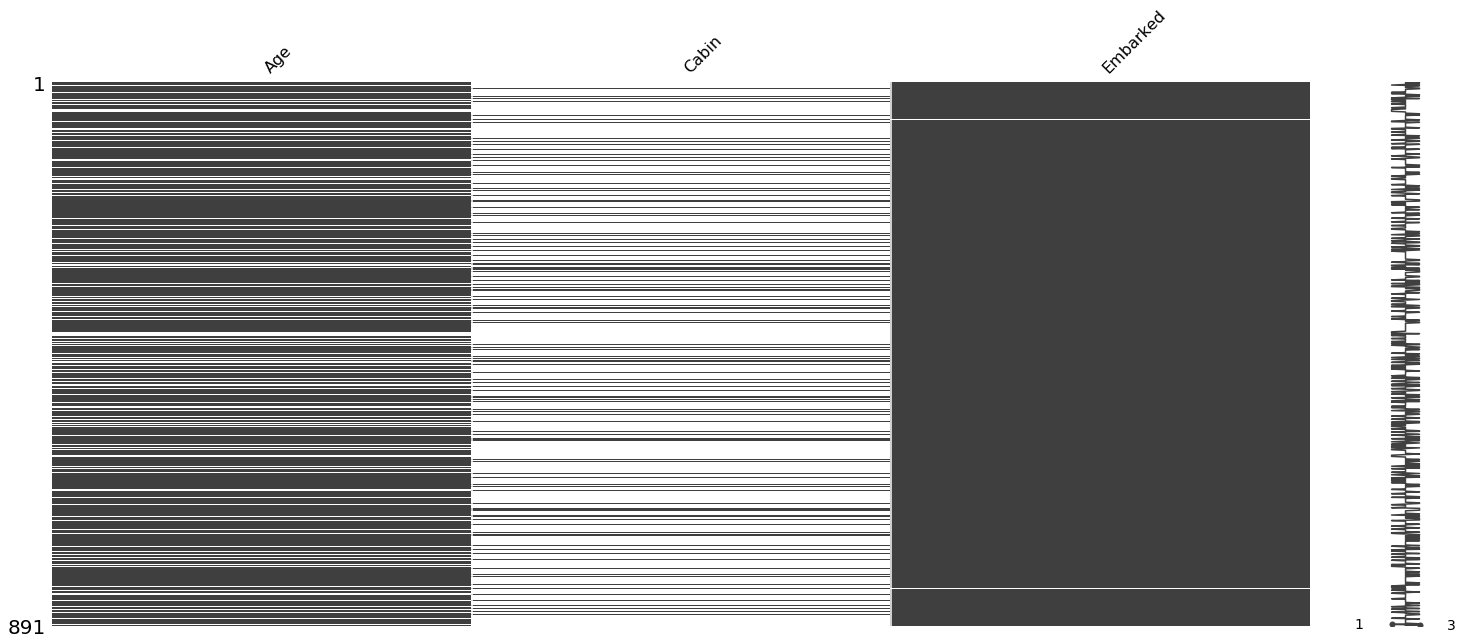

In [275]:
# Missing data to list
missingdata_df = train.columns[train.isnull().any()].tolist()

# Compare missing data to dataset
msno.matrix(train[missingdata_df])

# Make bar graph from missing data
#msno.heatmap(train[missingdata_df], figsize=(20,20))

# Exploration

Which variables are interesting and we need to put in our model?

In [257]:
train.corr()

# Based on the correlation we have the following hypothesses:
# 1. Pclass, Fare have a relatively high linear correlation with Survived --> are correlated
# 2. Sex is going to be relevant for predicted the survival

# More exploration necessary with name/ticket/cabin/embarked

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


(0, 300)

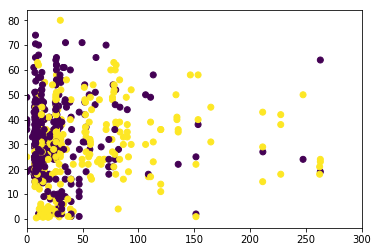

In [258]:
plt.scatter(train["Fare"], train["Age"], c = train["Survived"])
plt.xlim(0, 300)

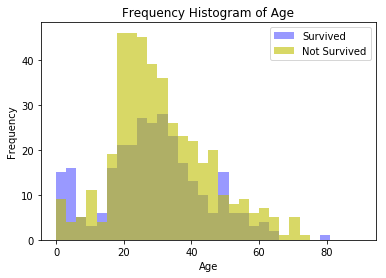

In [263]:
plt.hist(age1, range = (0,90), bins = 30, alpha = 0.4, color='b', label = "Survived")
plt.hist(age2, range = (0,90), bins = 30, alpha = 0.6, color= 'y', label = "Not Survived")
plt.gca().set(title='Frequency Histogram of Age', ylabel='Frequency', xlabel='Age')
plt.legend()

ValueError: too many values to unpack (expected 2)

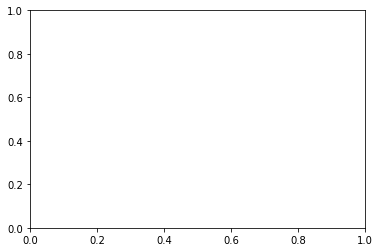

In [261]:
pclass1 = survived["Pclass"].dropna()
pclass2 = not_survived["Pclass"].dropna().value_counts()

plt.hist(pclass1, 3, [1,2,3])